In [1]:
import pandas as pd
import numpy as np

# Set the number of customers
num_customers = 200

# Generate random data for each feature
customer_ids = np.arange(1, num_customers + 1)
genders = np.random.choice(['Male', 'Female'], size=num_customers)
ages = np.random.randint(18, 65, size=num_customers)
annual_incomes = np.random.randint(15, 150, size=num_customers)
spending_scores = np.random.randint(1, 100, size=num_customers)

# Create a Pandas DataFrame
customer_data = pd.DataFrame({
    'CustomerID': customer_ids,
    'Gender': genders,
    'Age': ages,
    'Annual Income (k$)': annual_incomes,
    'Spending Score (1-100)': spending_scores
})

# Save the DataFrame to a CSV file
customer_data.to_csv('customer_data.csv', index=False)

print("Customer dataset created and saved to 'customer_data.csv'")

Customer dataset created and saved to 'customer_data.csv'


In [ ]:
# Select features for clustering (Age, Annual Income, Spending Score)
X = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # Using the exact column names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

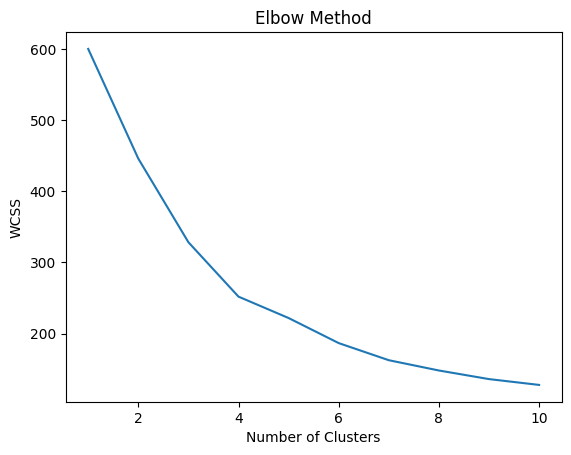

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()  # To see the output, run the code.

# Apply K-Means with the optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

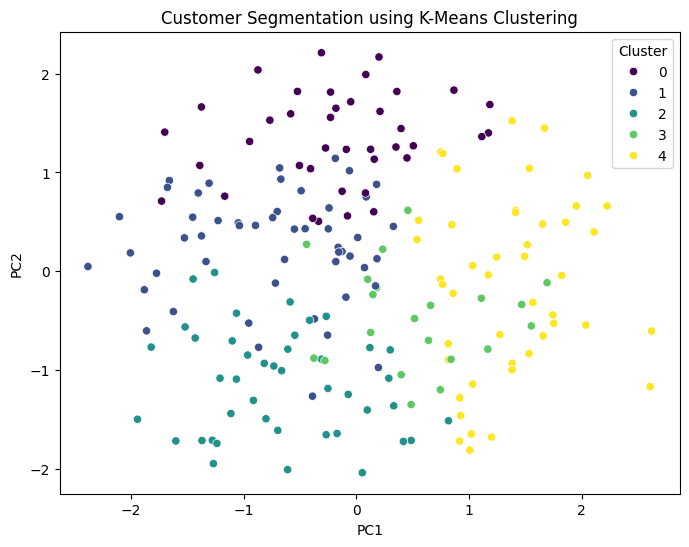

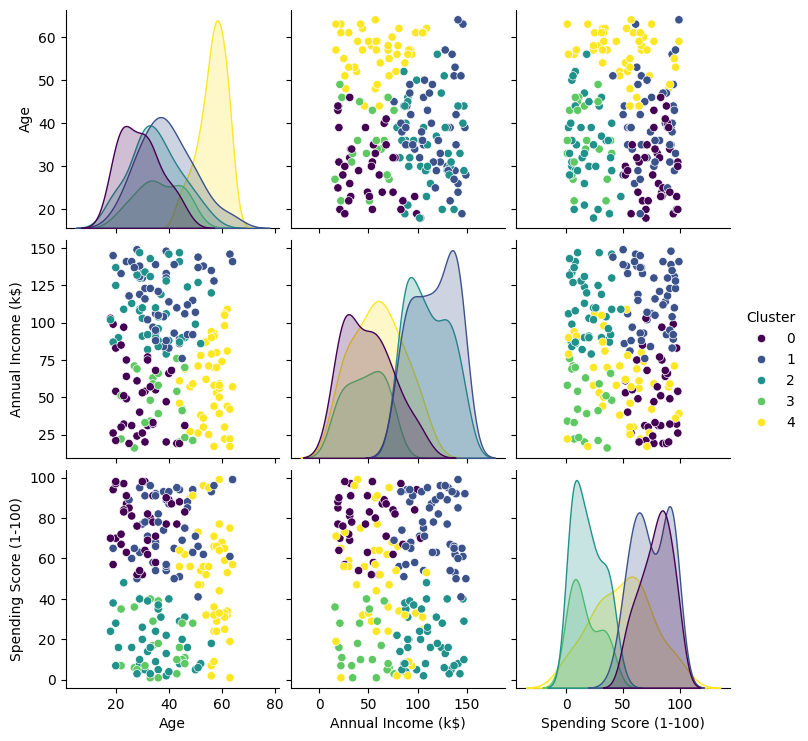

In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA

# 2D Scatter Plot using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = customer_data['Cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Customer Segmentation using K-Means Clustering')
plt.show()  # To see the output, run the code.


# Pair Plots
sns.pairplot(customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']], hue='Cluster', palette='viridis')
plt.show() #

# Centroid Visualization (optional)
centroids = kmeans.cluster_centers_
# You can plot centroids on the scatter plot for further analysis